In [263]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Partial PCA on all features

In [264]:
india_pca = pd.read_csv('./data/all_india_full.csv')
subset_pca = pd.DataFrame(columns=india_pca.columns)

# Filter for Non-Tribal, Non-austroasiatic
for i, row in india_pca.iterrows():
    if row['language']!='Austroasiatic' and row['people']!='Tribal':
        subset_pca = subset_pca.append(row)

In [265]:
subset_pca = subset_pca.reset_index()
codings = subset_pca

In [266]:
features = ['cv_'+str(i+1) for i in range(37)]
# Separating out the features
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['region']].values

In [267]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Vocal Complexity', 'Instrumentation'])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

## Scree

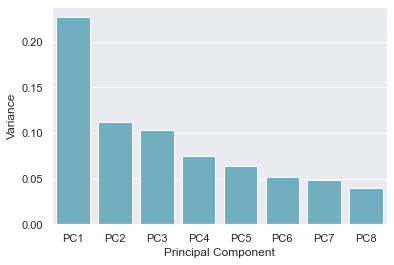

In [268]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8']}) 
sns.set(font='Arial')
sns.barplot(x='Principal Component',y="Variance", 
           data=df, color="c")

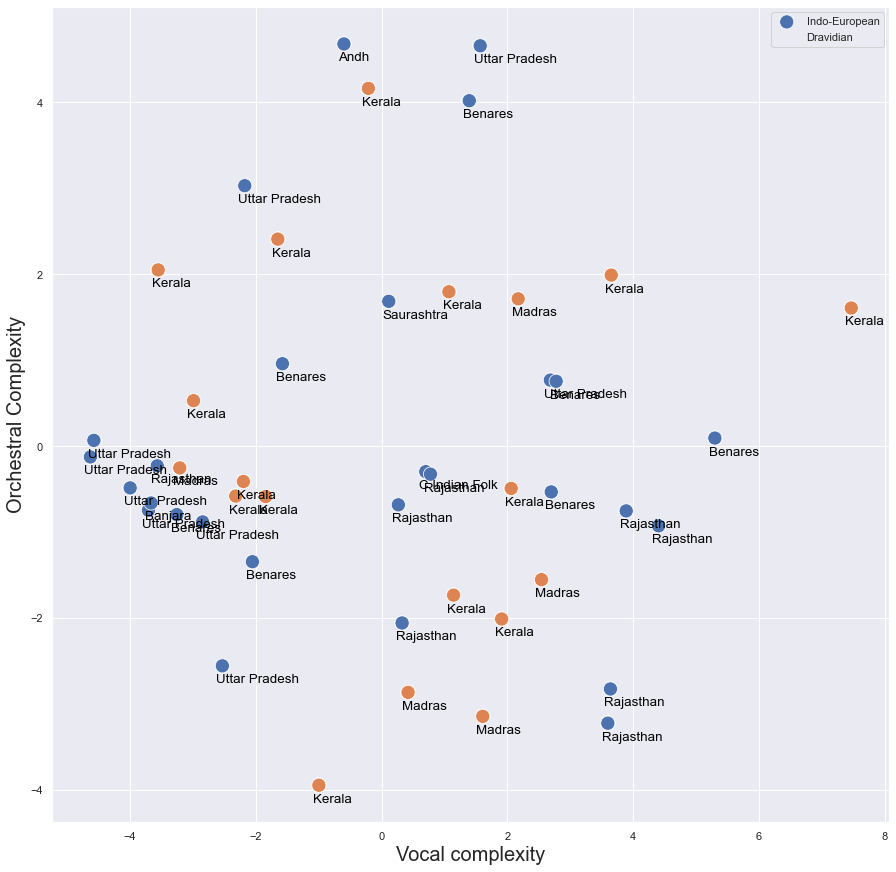

In [269]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Vocal Complexity']
               , finalDf.loc[indicesToKeep, 'Instrumentation'], hue=targets, s=200)

p1.set_xlabel('Vocal complexity', fontsize=20) 
p1.set_ylabel('Orchestral Complexity', fontsize=20)
plt.rcParams.update({'font.size':16})

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Vocal Complexity']-0.1, finalDf.loc[line, 'Instrumentation']-0.2, codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle._size = [20.0]
                                    
plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/pca/partial_recordings_all_feat.png")

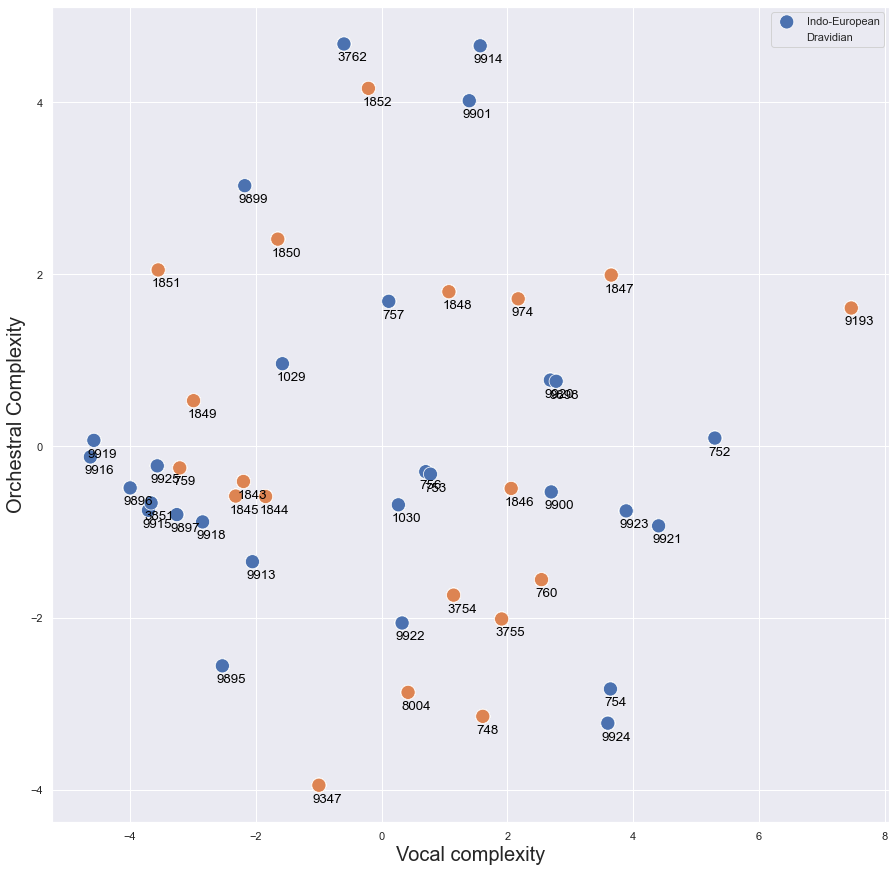

In [270]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Vocal Complexity']
               , finalDf.loc[indicesToKeep, 'Instrumentation'], hue=targets, s=200)

p1.set_xlabel('Vocal complexity', fontsize=20) 
p1.set_ylabel('Orchestral Complexity', fontsize=20)
plt.rcParams.update({'font.size':16})

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Vocal Complexity']-0.1, finalDf.loc[line, 'Instrumentation']-0.2, 
             codings.loc[line, 'canto_coding_id'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle._size = [20.0]
                                    
plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/pca_cid/partial_recordings_all_feat.png")

## Explained Variance

In [271]:
pca.explained_variance_

array([8.56953178, 4.22720946, 3.88430132, 2.83625098, 2.40151887,
       1.9675631 , 1.8129038 , 1.51031548])

In [272]:
pca.explained_variance_ratio_

array([0.22681154, 0.11188241, 0.10280659, 0.07506763, 0.06356149,
       0.05207589, 0.04798249, 0.03997383])

## Variable Loadings

In [273]:
line_metadata = pd.read_csv('./line_metadata.csv')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/loadings/partial_recordings_all_feat.csv')

# Full PCA on all features

In [274]:
india_pca = pd.read_csv('./data/all_india_full.csv')
codings = india_pca

In [275]:
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['language']].values

In [276]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Melodic Complexity', 'Vocal Style'])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

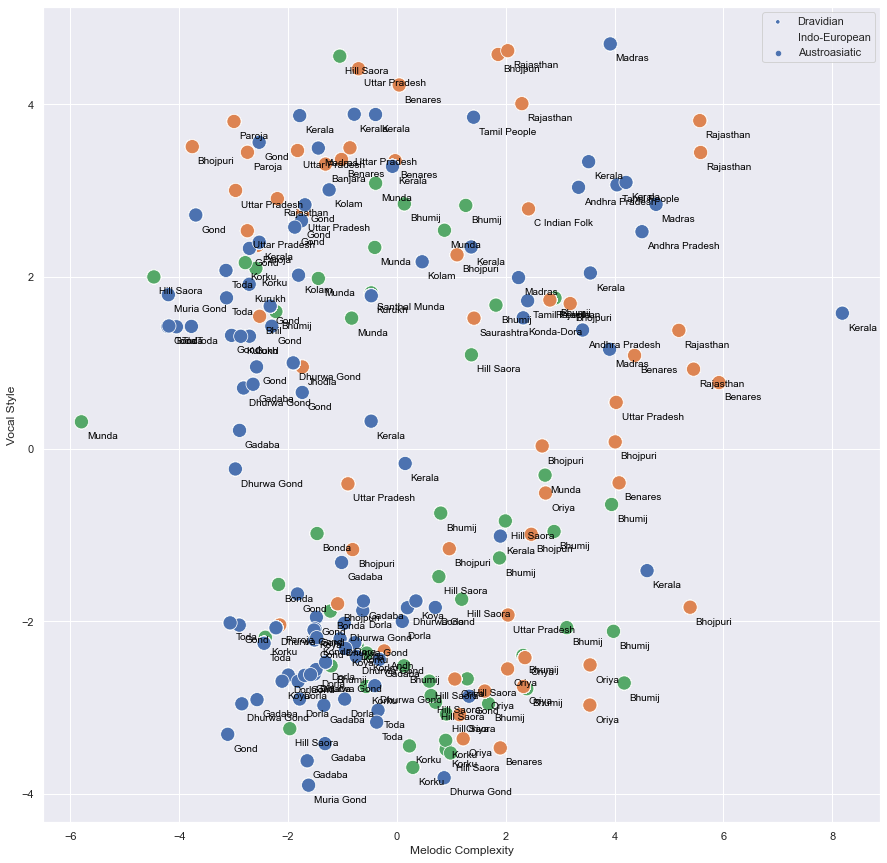

In [277]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Melodic Complexity']
               , finalDf.loc[indicesToKeep, 'Vocal Style'], hue=targets, s=200)


    

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Melodic Complexity']+0.1, finalDf.loc[line, 'Vocal Style']-0.2, codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/all_recordings_all_feat.png")

## Explained Variance

In [278]:
pca.explained_variance_

array([6.30524733, 6.19551102])

In [279]:
pca.explained_variance_ratio_

array([0.16961099, 0.16665908])

## Variable Loadings

In [280]:
line_metadata = pd.read_csv('./line_metadata.csv')

In [281]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/loadings/all_recordings_all_feat.csv')

# Full PCA on subset of features

In [282]:
drop_features = ['cv_1','cv_5','cv_6','cv_12','cv_22','cv_2','cv_3','cv_8','cv_9','cv_13','cv_14','cv_27']
subset = []
numbers = []
for i in range(1,38):
    feature = 'cv_'+str(i)
    if feature not in drop_features:
        subset.append(feature)
        numbers.append(i)

In [283]:
india_pca = pd.read_csv('./data/all_india_full.csv')
codings = india_pca
x = codings.loc[:, subset].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['language']].values

In [284]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Melodic Complexity', 'Vocal Style'])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

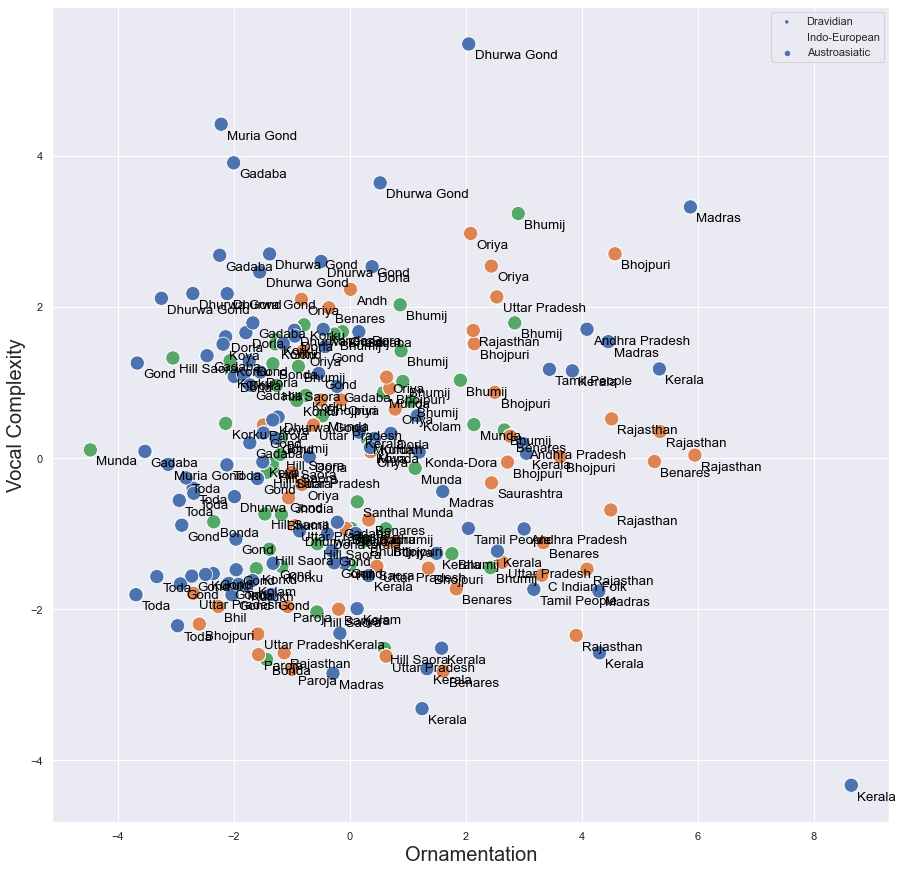

In [285]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Melodic Complexity']
               , finalDf.loc[indicesToKeep, 'Vocal Style'], hue=targets, s=200)

p1.set_xlabel('Ornamentation', fontsize=20) 
p1.set_ylabel('Vocal Complexity', fontsize=20)
plt.rcParams.update({'font.size':16})

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Melodic Complexity']+0.1, finalDf.loc[line, 'Vocal Style']-0.2, codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/pca/all_recordings_subset_feat.png")

## Explained Variance

In [286]:
pca.explained_variance_

array([4.99901588, 2.64689539])

In [287]:
pca.explained_variance_ratio_

array([0.19899464, 0.10536434])

## Loadings

In [288]:
subset_metadata = pd.DataFrame(columns=line_metadata.columns)
for i, row in line_metadata.iterrows():
    if (i+1) in numbers:
        subset_metadata = subset_metadata.append(row)

In [289]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=subset_metadata['var_title'])
loadings.to_csv('./output/loadings/all_recordings_subset_feat.csv')

# Partial PCA on subset of features

In [290]:
india_pca = pd.read_csv('./data/all_india_full.csv')
subset_pca = pd.DataFrame(columns=india_pca.columns)

# Filter for Non-Tribal, Non-austroasiatic
for i, row in india_pca.iterrows():
    if row['language']!='Austroasiatic' and row['people']!='Tribal':
        subset_pca = subset_pca.append(row)

subset_pca = subset_pca.reset_index()
codings = subset_pca

In [291]:
# Separating out the features
x = codings.loc[:, subset].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['region']].values

In [292]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal component 1', 'Principal component 2'])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

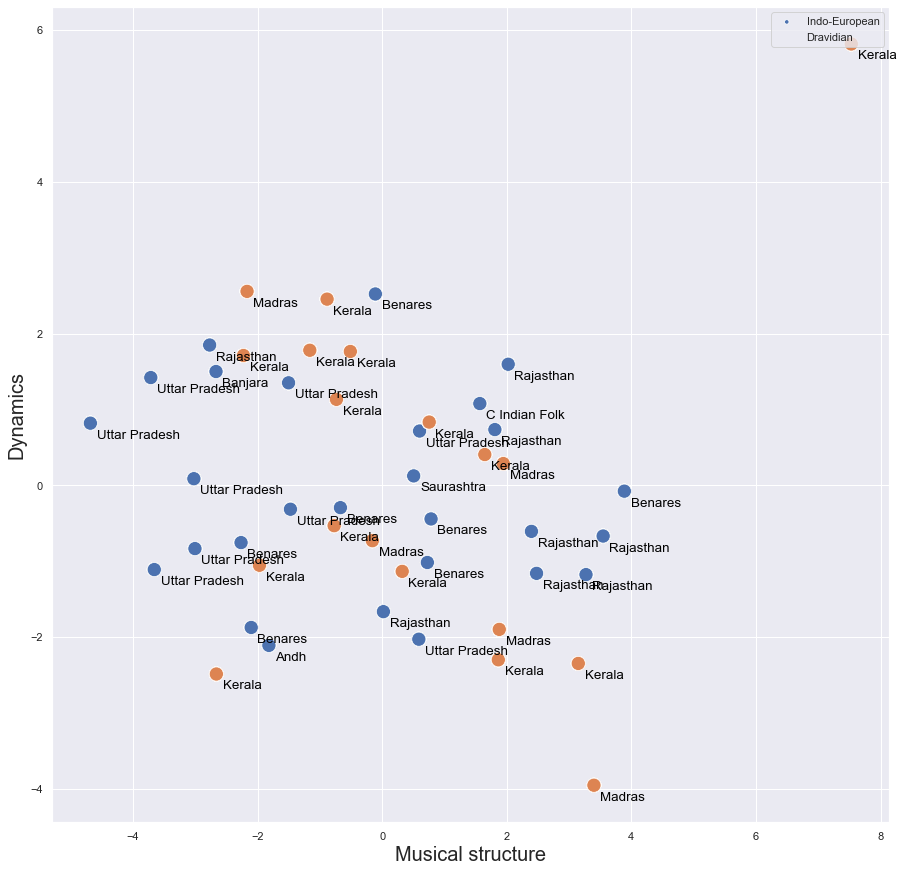

In [293]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2'], hue=targets, s=200)

  
p1.set_xlabel('Musical structure', fontsize=20) 
p1.set_ylabel('Dynamics', fontsize=20)
plt.rcParams.update({'font.size':16})

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Principal component 1']+0.1, finalDf.loc[line, 'Principal component 2']-0.2,
             codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/pca/partial_recordings_subset_feat.png")

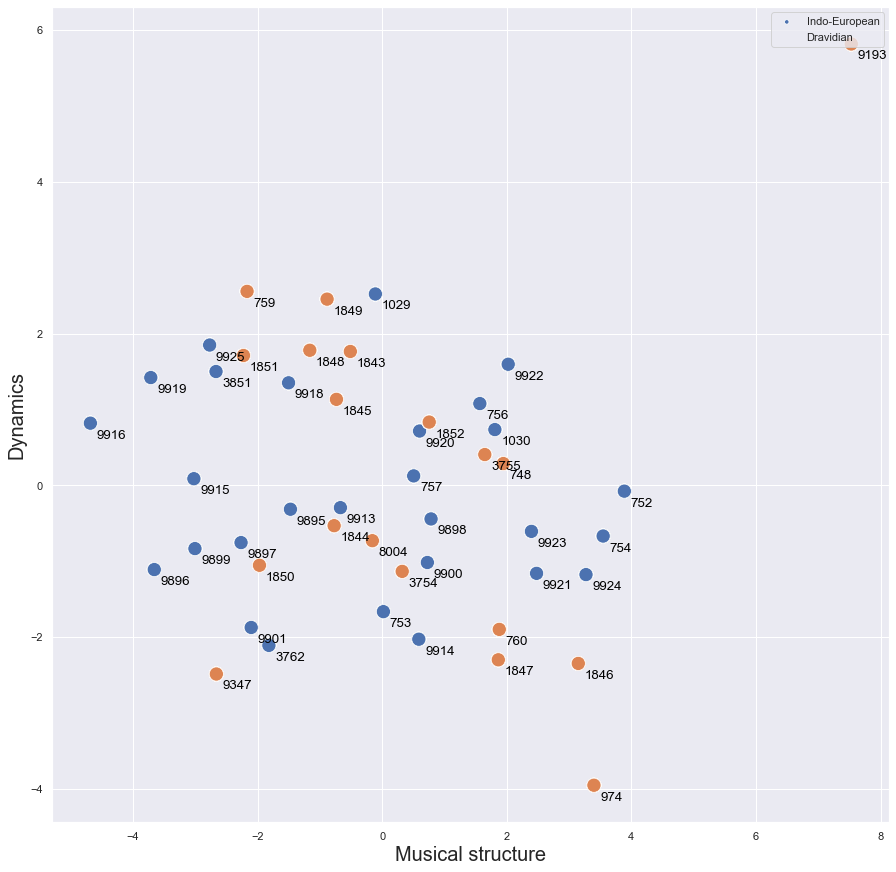

In [294]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2'], hue=targets, s=200)

  
p1.set_xlabel('Musical structure', fontsize=20) 
p1.set_ylabel('Dynamics', fontsize=20)
plt.rcParams.update({'font.size':16})

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Principal component 1']+0.1, finalDf.loc[line, 'Principal component 2']-0.2,
             codings.loc[line, 'canto_coding_id'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/pca_cid/partial_recordings_subset_feat.png")

## Explained Variance

In [295]:
pca.explained_variance_

array([6.05351722, 3.06121497])

In [296]:
pca.explained_variance_ratio_

array([0.23698876, 0.11984331])

## Loadings

In [297]:
subset_metadata = pd.DataFrame(columns=line_metadata.columns)
for i, row in line_metadata.iterrows():
    if (i+1) in numbers:
        subset_metadata = subset_metadata.append(row)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=subset_metadata['var_title'])
loadings.to_csv('./output/loadings/partial_recordings_subset_feat.csv')